In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geocoder
from time import sleep

In [2]:
from scipy.optimize import fmin, fmin_bfgs

In [3]:
import seaborn as sns
sns.set(style="ticks", palette="Set2")

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
cd

/Users/mmngreco


In [4]:
pwd

'/Users/mmngreco/Documents/repos/unizar/SIAD/Trabajo Grupo'

In [5]:
%matplotlib inline

# PROBLEMA 

## $\min_{x_0, y_0}{\sum{c_i · w_i · d_i}}$

## $d_i = \sqrt{(x_i - x_0)^2 + (y_i - x_0)^2}$

__DONDE:__

- $c_i$: Coste ¿unitario?.
- $w_i$: Unidades demandadas de bienes (media de los últimos 3 años)
- $d_i$: Distancia al almacén.
- $x_i$: Coordenada eje x (Longitud)
- $y_i$: Coordenada eje y (Latitud)

__Variables de decisión:__ $x_0, y_0$ 

In [6]:
def func_obj(xy0):
    'Función Obejtivo, xy0: Tupla, pares de coordenadas'
    return sum(wi * ci * di(xy0))
    

# SIMULACIÓN

## DEMANDA (CLIENTES)

### SERIE TEMPORAL TIPO:

### $y_t = \delta_0 + \delta_1 · t + u_t$

### Donde:
- $y_t$ : Ventas para cada período t.
- $\delta_0$ : Ventas indendientes o autónomas. (Stock de Seguridad pe.)
- $\delta_1$ : Pendiente la recta.
- $u_t$ : Ruido ~ N(0, 5)

En este caso para darle más realismo, $\delta_0 = \delta_a + \delta_b · sin(x)$, de esta forma introducimos un posible componente estacional, que depende cuán grande sea $\delta_b$.

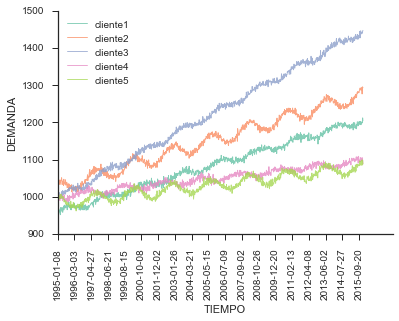

In [26]:
clientes = dict()
days_by_year = 365
nperiodos = 3 * days_by_year
tiempo = np.linspace(0 , 50, nperiodos)

for c in range(5):

    pendiente = np.random.uniform(0.5, 10)
    ruido = np.random.normal(0, 5, nperiodos)
    freq = np.random.normal(10, 10)
    demanda_a = np.random.normal(1000, 30)
    band = np.random.uniform() < 0.4
    demanda = demanda_a + (np.cos(tiempo)*band + np.sin(tiempo)*(1-band)) * freq + pendiente * tiempo + ruido
    cname = 'cliente%s' % (c+1)
    clientes[cname] = demanda

    plt.plot(demanda, alpha=0.8, label=cname, linewidth=0.91)

sns.despine()
plt.legend(loc=2)
tlabel = pd.date_range(end='2015-12-31', periods=nperiodos, freq='W')
plt.xlabel('TIEMPO')
plt.xticks(range(0, len(tiempo), 60), [t.date() for t in tlabel[0::60]], rotation=90)
plt.ylabel('DEMANDA')

In [27]:
ventas = pd.DataFrame.from_dict(clientes)

In [28]:
ventas.index = tlabel

In [29]:
ventas.head()

,cliente1,cliente2,cliente3,cliente4,cliente5
1995-01-08,954.793975,1038.969218,997.691045,995.407796,1004.244602
1995-01-15,957.975272,1044.492813,993.331361,995.808551,1003.350615
1995-01-22,957.093363,1032.280199,997.580720,1002.436598,1004.486866
1995-01-29,951.073010,1042.063428,999.335594,1003.540070,1001.795766
1995-02-05,952.725886,1046.256454,995.540480,1000.350519,998.044606


In [37]:
path = 'Documents/repos/unizar/SIAD/Trabajo Grupo/'
data_clientes = pd.read_csv('clientes_xys.csv')

In [38]:
clientes_names = ['cliente1', 'cliente2', 'cliente3', 'cliente4', 'cliente5']
data_clientes.index = clientes_names

In [39]:
data_clientes

,prov,lat,lng
cliente1,bilbao,43.263013,-2.934985
cliente2,huesca,42.131845,-0.407806
cliente3,madrid,40.416775,-3.703790
cliente4,oviedo,43.361915,-5.849389
cliente5,zaragoza,41.648823,-0.889085


In [40]:
yi = data_clientes.lat.values
xi = data_clientes.lng.values

In [41]:
list(xi)

[-2.9349852000000003,
 -0.4078058,
 -3.7037902000000003,
 -5.8493887000000004,
 -0.88908530000000008]

## COSTES

$c_i$: Es el coste por unidad de producto vendida.

Suponemos que esta empresa ya maximiza beneficios y los precios son exógenos. Por tanto la oferta igual a la demanda, siendo ésta última estimada como la media de los últimos 3 años.

$w_i$ = $E(w_i|T)$

In [43]:
wi = ventas.mean()
ci = np.random.uniform(1, 100) + 1
di = lambda xy0: np.sqrt((xi-xy0[0]) ** 2 + (yi-xy0[1]) ** 2)

In [44]:
wi

cliente1    1082.111707
cliente2    1149.523368
cliente3    1220.257742
cliente4    1048.360400
cliente5    1030.603666
dtype: float64

# OPTIMIZACIÓN

In [45]:
res = fmin(func_obj, [0,0])

Optimization terminated successfully.
         Current function value: 273617.435509
         Iterations: 100
         Function evaluations: 191


In [46]:
res

array([ -2.45884627,  42.16927919])

# RESULTADO

Con los datos simulados, la solución óptima para el problema planteado es [ 42.23885306,  -2.5716388 ], y la función toma el valor 934296.653775.

In [54]:
file_name = 'xys_backup.csv'
file_name_new = 'pais_ca_prov_rejilla.csv'

In [67]:
muestra_xys = pd.read_csv(file_name_new)
muestra_xys.drop_duplicates(inplace=True)

In [68]:
muestra_xys.head()

,pais,ca,prov,lat,lng
0,PT,Setúbal,Grândola,38.180107,-8.71207
1,PT,Setúbal,Grândola,38.180107,-8.41926
2,PT,Faro,Silves,37.277379,-8.41926
3,PT,Bragança,Mogadouro,41.249382,-6.66240
4,PT,Bragança,Mogadouro,41.429927,-6.66240


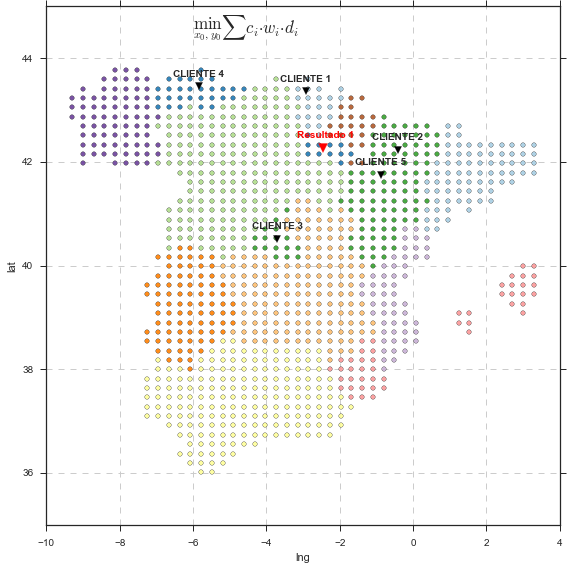

In [73]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)

color = sns.color_palette("Paired", 17)

n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

# TERRITORIO
for i, region in enumerate(muestra_xys[muestra_xys.pais == 'ES'].ca.unique()):
    i = n_color[i]
    muestra_xys[muestra_xys.ca == region].plot(kind='scatter', 
                                 x='lng', 
                                 y='lat', 
                                 alpha=0.9, 
                                 ax=ax, 
                                 color=color[i], 
                                 marker='o',
                                 linewidths=.3)
# CLIENTES
for i, (y, x) in enumerate(zip(data_clientes.lat.values, data_clientes.lng.values)):

    plt.scatter(x, y*1.0025, color='black', marker='v', s=50)
    plt.text(x - 0.7,
             y + 0.3,
             'CLIENTE %s' % (i+1), weight='bold')

# RESULTADO
plt.scatter(res[0], res[1]*1.0025, color='red', marker='v', s=80)
plt.text(res[0] - 0.7, 
         res[1] + 0.3, 
         'Resultado 1',
         weight='bold',
         color='red')


plt.text(-6, 44.5, '$\min_{x_0,y_0}{\sum{c_i·w_i·d_i}}$', weight='bold', fontsize=17)

plt.xlim(-10,4)
ax.grid(True, linestyle='--')
plt.tight_layout()


> __NOTA:__ 
En los mapas físicos, las coordenadas están expresadas en grados, por ejemplo Puerto Rico sería: 18°14’70” N  66°29’68” W
Para convertir:
- $(18°14'70" N) = (18 + (14 / 60) + (70 / 3600)) = 18.252$
- $(66°29'68" W) = -(66 + (29 / 60) + (68 / 3600)) = -66.8627$

> La longitud se multiplica por __negativo__, porque está a la __izquierda (oeste)__ del punto 0,0.

# RESTRICCIÓN ADICIONAL

Al problema anterior, le agregamos una restricción adicional de tipo geográfica. Cada comunidad autónoma pasará a cobrar un impuesto por unidad vendida, el tipo impositivo dependerá de la comunidad autónoma, de forma que es probable que la elección óptima cambie.

Es decir:

# PROBLEMA INICIAL + RESTRICCIÓN

## $\min_{x_0, y_0}{\sum{c_i(1+t_i) · w_i · d_i}}$

__DONDE:__

- $c_i$: Coste unitario.
- $w_i$: Unidades demandadas de bienes (media de los últimos 3 años).
- $d_i$: Distancia al almacén.
- $x_i$: Coordenada eje x (Longitud).
- $y_i$: Coordenada eje y (Latitud).
- __$t_i$: Impuesto por unidad vendida.__

__Variables de decisión (Coordenadas):__ $x_0, y_0$ 


In [74]:
muestra_xys.head()

,pais,ca,prov,lat,lng
0,PT,Setúbal,Grândola,38.180107,-8.71207
1,PT,Setúbal,Grândola,38.180107,-8.41926
2,PT,Faro,Silves,37.277379,-8.41926
3,PT,Bragança,Mogadouro,41.249382,-6.66240
4,PT,Bragança,Mogadouro,41.429927,-6.66240


In [125]:
data_ca = muestra_xys[muestra_xys.pais == 'ES'].ca.unique()

# UNIFICAR LOS NOMBRES DE LAS CCAA

In [126]:
data_ca

array(['GA', 'EX', 'Comunidad de Madrid', 'CL', 'CT', 'PM', 'AL',
       'La Rioja', 'CM', 'Comunidad Valenciana', 'Navarra',
       'Principado de Asturias', 'PV', 'Cantabria', 'Aragón',
       'Región de Murcia'], dtype=object)

In [156]:
list(ca_iso.nombre.values)

['Andalucía',
 'Aragón',
 'Asturias, Principado de',
 'Canarias',
 'Cantabria',
 'Castilla La Mancha !\xa0Castilla-La Mancha',
 'Castilla y León',
 'Catalunya (ca) [Cataluña]',
 'Extremadura',
 'Galicia (gl) [Galicia]',
 'Illes Balears (ca) [Islas Baleares]',
 'La Rioja',
 'Madrid, Comunidad de',
 'Murcia, Región de',
 'Navarra, Comunidad Foral de Nafarroako Foru Komunitatea (eu)',
 'País Vasco Euskal Herria (eu)',
 'Valenciana, Comunidad Valenciana, Comunitat (ca)',
 'Ceuta',
 'Melilla']

In [176]:
# RENOMBRAR 
rename_ca = dict()
for dca in data_ca:
    if len(dca) < 3: continue
    print(dca)
    buscar = dca.split()[-1]
    res = ca_iso[buscar == ca_iso.nombre.apply(lambda x: list(filter(lambda y: len(y)> 2, x.replace(',', '').split()))[0])]
    print(buscar, res.codigo.values[0])
    rename_ca[dca] = res.codigo.values[0][-2:]



Comunidad de Madrid
Madrid ES-MD
La Rioja
Rioja ES-RI
Comunidad Valenciana
Valenciana ES-VC
Navarra
Navarra ES-NC
Principado de Asturias
Asturias ES-AS
Cantabria
Cantabria ES-CB
Aragón
Aragón ES-AR
Región de Murcia
Murcia ES-MC


In [190]:
renamed = list()
for ca in muestra_xys[muestra_xys.pais == 'ES'].ca.values:
    if len(ca) < 3:
        renamed.append(ca)
    else:
        renamed.append(rename_ca[ca])
    

In [194]:
spain_xys = muestra_xys[muestra_xys.pais == 'ES']
spain_xys.loc[:, 'ca'] = renamed

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [195]:
spain_xys.ca.unique()

array(['GA', 'EX', 'MD', 'CL', 'CT', 'PM', 'AL', 'RI', 'CM', 'VC', 'NC',
       'AS', 'PV', 'CB', 'AR', 'MC'], dtype=object)

In [110]:
prov_iso.head()

,codigo,nombre,ca
0,ES-C,A Coruña (gl) [La Coruña],GA
1,ES-VI,Alava !Álava Araba (eu),PV
2,ES-AB,Albacete,CM
3,ES-A,Alicante Alacant (ca),VC
4,ES-AL,Almería,AN


In [111]:
ca_iso.head()

,codigo,nombre
0,ES-AN,Andalucía
1,ES-AR,Aragón
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria


In [198]:
ccaa = spain_xys.ca.unique()

In [204]:
ti = np.random.uniform(size=18)

In [205]:
for i,t in enumerate(ti):
    print('%s t%s\t%s' % (ccaa[i], (i+1), t))
    

GA t1	0.989499996648
EX t2	0.613800474813
MD t3	0.436144970719
CL t4	0.56899202934
CT t5	0.938345813292
PM t6	0.558668070728
AL t7	0.137155852966
RI t8	0.300872795791
CM t9	0.826378677993
VC t10	0.132469990649
NC t11	0.21702740907
AS t12	0.500348782472
PV t13	0.855532912058
CB t14	0.497530525255
AR t15	0.593214043748
MC t16	0.702573020482


IndexError: index 16 is out of bounds for axis 0 with size 16

# EN R 

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%R -o data data <- readRDS("Downloads/ESP_adm1-2.rds")

In [ ]:
%%R
plot(data[1])

# Google Maps

![](http://www.elandroidelibre.com/wp-content/uploads/2015/06/google-maps-logo.jpg)

In [75]:
# PRUEBA 
# COORDENADAS DE LAS LOCALIDADES

localidades = ['zaragoza', 
               'oviedo', 
               'huesca', 
               'madrid', 
               'bilbao']

coords = dict()

for loc in localidades:

    g = geocoder.google(loc)
    
    print('city', g.json['city'])
    print('state', g.json['state'])
    print('address', g.json['address'])
    print('county', g.json['county'])

    lat = g.json['lat']
    lng = g.json['lng']

    print(loc, lat, lng)
    print('\n––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––\n')
    coords[loc] = [lat, lng]


city Zaragoza
state Aragon
address Zaragoza, Zaragoza, Spain
county Z
zaragoza 41.6488226 -0.8890853 41.6583112552

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

city Oviedo
state Principado de Asturias
address Oviedo, Asturias, Spain
county O
oviedo 43.3619145 -5.8493887 43.7546680626

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

city Huesca
state Aragon
address Huesca, Huesca, Spain
county Huesca
huesca 42.131845 -0.4078058 42.1338185864

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

city Madrid
state Community of Madrid
address Madrid, Madrid, Spain
county M
madrid 40.4167754 -3.7037902 40.5861281176

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

city Bilbao
state PV
address Bilbao, Biscay, Spain
county BI
bilbao 43.2630126 -2.9349852 43.3624537746

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––



# MUESTREO ALEATORIO SIMPLE 
---


In [123]:
%%HTML
<iframe src="https://mapsengine.google.com/map/embed?mid=zTtXepJtMlLc.k6VXMPFTI7DI" width="740" height="480"></iframe>

In [214]:
muestreos_restantes = 8

In [215]:
# montecarlo
nobs = np.sqrt(20000)
xmin, xmax = -9.29769, 3.29314
ymax = 43.77702
ymin = 36.01356

xs = np.repeat(np.linspace(xmin, xmax, nobs), nobs)
ys = list(np.linspace(ymin, ymax, nobs)) * nobs
ys = np.array(ys).flatten()

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


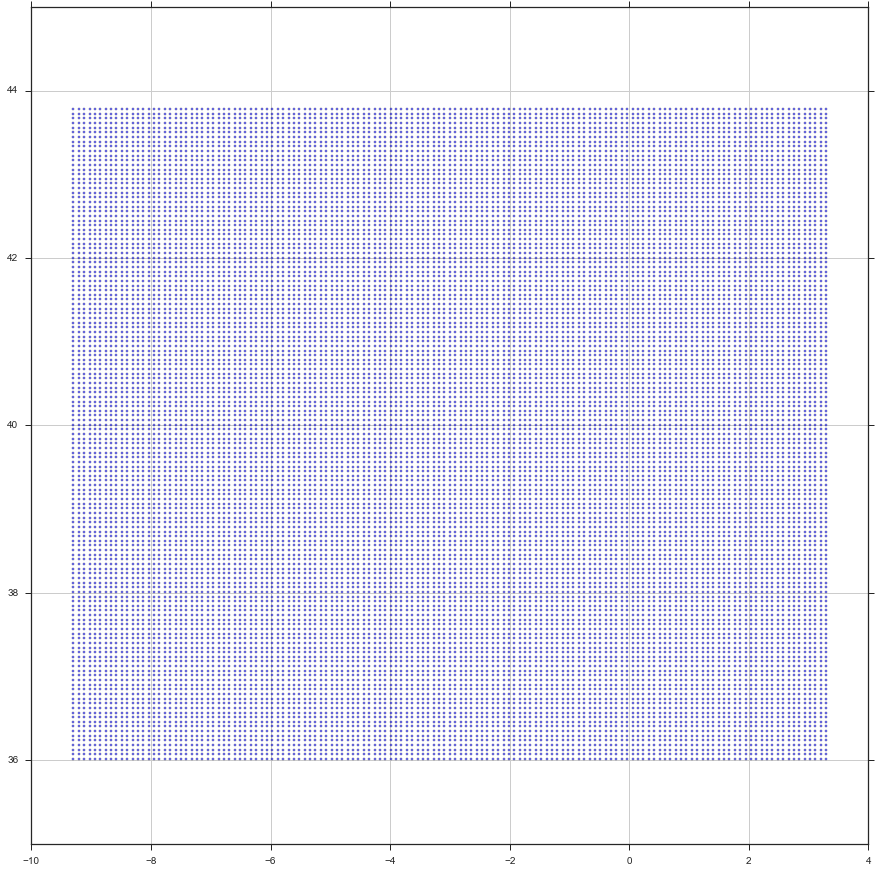

In [217]:
plt.figure(figsize=(15,15))
plt.scatter(xs, ys, marker='.', alpha=0.6)
plt.gca().grid(True)

# MONTECARLO

## INFORMACIÓN

In [118]:
g = geocoder.google([41.6894079, -0.8427317], method='reverse')

In [119]:
g.json

{'accuracy': 'ROOFTOP',
 'address': 'Diseminado S Gregorio el Cascajo, 9124, 50059 Zaragoza, Zaragoza, Spain',
 'bbox': {'northeast': [41.6924489802915, -0.842331019708498],
  'southwest': [41.6897510197085, -0.8450289802915021]},
 'city': 'Zaragoza',
 'confidence': 9,
 'country': 'ES',
 'county': 'Z',
 'encoding': 'utf-8',
 'housenumber': '9124',
 'lat': 41.6911,
 'lng': -0.84368,
 'location': '41.6894079, -0.8427317',
 'ok': True,
 'postal': '50059',
 'provider': 'google',
 'quality': 'street_address',
 'state': 'Aragón',
 'status': 'OK',
 'status_code': 200,
 'street': 'Diseminado S Gregorio el Cascajo'}

In [120]:
g.json['county']

'Z'

# MUESTREO

In [227]:
# googlemaps
# from collections import defaultdict
# montecarlo = defaultdict(lambda : defaultdict(lambda : defaultdict(tuple)))
montecarlo = dict()
n=0
muestreo_n = 1

ini = n + 2500 * (muestreo_n - 1)
fin = 2500 * muestreo_n

if muestreo_n == muestreos_restantes: 
    print('MUESTREO COMPLETADO!!!')
else:
    for x in zip(ys[ini:fin], xs[ini:fin]):
        g = geocoder.google(x, method='reverse')
        n += 1
        try:
            loc = '%s: %s: %s' % (g.json['country'], g.json['state'], g.json['county'])
        except:
            continue
        xy = [list(x)]
        montecarlo[loc] = montecarlo.get(loc, xy) + xy

    print(n)
muestreos_restantes -= 1
muestreo_n += 1

2500


In [228]:
print(n, muestreo_n, muestreos_restantes)

2500 2 7


# MAPA DEL MUESTREO

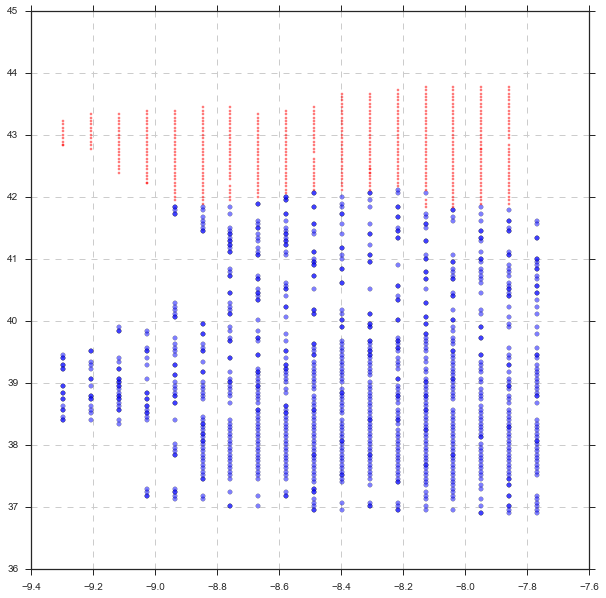

In [229]:
plt.figure(figsize=(10,10))
for k, cs in montecarlo.items():
    x = [c[0] for c in cs]
    y = [c[1] for c in cs]

    if k.startswith('ES'):
        plt.scatter(y, x, color='red', marker='.', alpha=0.5)
    else:
        plt.scatter(y, x, alpha=0.5)
plt.gca().grid(True, linestyle='--')
#plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# ALTERNATIVA

In [ ]:
mapquest_api = open('Documents/mq_api.txt').read()
gmaps_api = open('Documents/googlemaps_api.txt').read()
geocoder_api = open('Documents/geocoder_api.txt').read()
mbox_api = open('Documents/mbox_api.txt').read()

# EXPORTAR DATOS

In [232]:
fname = 'xys.csv'
f = open(fname, 'w')
for key, xys in montecarlo.items():
    for xy in xys:
        print('%s,%s,%s,%s,%s' % (*key.split(': '), *xy), file=f)

f.close()

# EXPORTAR DATOS

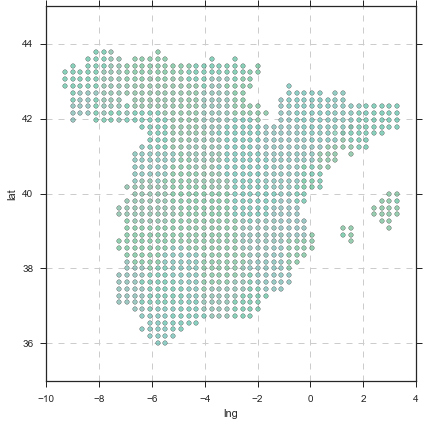

In [151]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

xys.dropna(inplace=True)
xys.drop_duplicates(inplace=True)

xys[xys.pais == 'ES'].plot(kind='scatter', x='lng', y='lat', alpha=0.7, ax=ax)

color = sns.color_palette("Set1", 17)
color = sns.color_palette("husl", len(xys[xys.pais == 'ES'].prov.unique()))
#color = sns.color_palette("cubehelix", 17)


#n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

for i, region in enumerate(xys[xys.pais == 'ES'].prov.unique()):
#    i = n_color[i]
    xys[xys.prov == region].plot(kind='scatter', 
                                 x='lng', 
                                 y='lat', 
                                 alpha=0.1, 
                                 ax=ax, 
                                 color=color[i], 
                                 marker='o')

plt.xlim(-10,4)
ax.grid(True, linestyle='--')
plt.tight_layout()

In [65]:
xys.to_csv('xys_backup.csv', index=False)

# CÓDIGO ISO PARA CCAA y PROVINCIAS

In [88]:
url = 'https://en.wikipedia.org/wiki/ISO_3166-2:ES'

# obtener códigos ISO:
ca_iso, prov_iso = pd.read_html(url, header=0, encoding='Latin')[:2]
prov_iso.columns = 'codigo nombre ca'.split()

ca_iso.drop(ca_iso.columns[-1], axis=1, inplace=True)
ca_iso.columns = 'codigo nombre'.split()

In [89]:
ca_iso

,codigo,nombre
0,ES-AN,Andalucía
1,ES-AR,Aragón
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria
5,ES-CM,Castilla La Mancha ! Castilla-La Mancha
6,ES-CL,Castilla y León
7,ES-CT,Catalunya (ca) [Cataluña]
8,ES-EX,Extremadura
9,ES-GA,Galicia (gl) [Galicia]


In [82]:
prov_iso

,codigo,nombre,ca
0,ES-C,A Coruña (gl) [La Coruña],GA
1,ES-VI,Alava !Álava Araba (eu),PV
2,ES-AB,Albacete,CM
3,ES-A,Alicante Alacant (ca),VC
4,ES-AL,Almería,AN
5,ES-O,Asturias,AS
6,ES-AV,Avila !Ávila,CL
7,ES-BA,Badajoz,EX
8,ES-PM,Balears (ca) [Baleares],IB
9,ES-B,Barcelona [Barcelona],CT
